In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Age"]=df["Age"].fillna(df["Age"].median())


In [6]:
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])

In [7]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df["Cabin"].value_counts()

Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64

In [11]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df["Sex"]=le.fit_transform(df["Sex"])

In [15]:
df["Embarked"]=le.fit_transform(df["Embarked"])

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df=df[['Survived', 'Pclass','Sex', 'Age','SibSp','Parch','Embarked']]

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df["Age"]=scaler.fit_transform(df[["Age"]])

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,-0.565736,1,0,2
1,1,1,0,0.663861,1,0,0
2,1,3,0,-0.258337,0,0,2
3,1,1,0,0.433312,1,0,2
4,0,3,1,0.433312,0,0,2


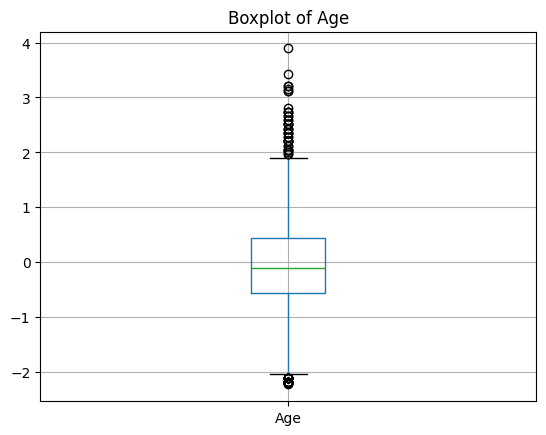

In [22]:
import matplotlib.pyplot as plt
df[['Age']].boxplot()
plt.title("Boxplot of Age")
plt.show()

In [23]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
df= df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


In [31]:
df.shape

(825, 7)

In [32]:
from sklearn.model_selection import train_test_split

In [37]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

In [38]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,-0.565736,1,0,2
1,1,0,0.663861,1,0,0
2,3,0,-0.258337,0,0,2
3,1,0,0.433312,1,0,2
4,3,1,0.433312,0,0,2


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64